## 1. Setup and Imports

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.2.3
📦 NumPy version: 2.1.3


## 2. Load Saved Model and Components

Load the trained model, scaler, label encoder, and metadata from the `saved_models/` directory.

In [2]:
print("=" * 80)
print("LOADING SAVED MODEL COMPONENTS")
print("=" * 80)

# Define paths
model_path = '../saved_models/best_model_latest.pkl'
scaler_path = '../saved_models/scaler_latest.pkl'
encoder_path = '../saved_models/label_encoder_latest.pkl'
metadata_path = '../saved_models/model_metadata_latest.pkl'

# Load components
try:
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    label_encoder = joblib.load(encoder_path)
    metadata = joblib.load(metadata_path)
    
    print("\n✅ All components loaded successfully!")
    print(f"\n📋 Model Information:")
    print(f"   • Model Type: {metadata['model_type']}")
    print(f"   • Model Name: {metadata['model_name']}")
    print(f"   • Trained on: {metadata['timestamp']}")
    print(f"   • Random State: {metadata['random_state']}")
    
    print(f"\n📊 Training Performance (from metadata):")
    perf = metadata['performance_metrics']
    print(f"   • Accuracy: {perf['accuracy']:.2f}%")
    print(f"   • Sensitivity: {perf['sensitivity']:.2f}% ⚠️ CRITICAL")
    print(f"   • Specificity: {perf['specificity']:.2f}%")
    print(f"   • ROC-AUC: {perf['roc_auc']:.4f}")
    print(f"   • False Negatives: {perf['false_negatives']} (Training)")
    
    print(f"\n🔧 Best Hyperparameters:")
    for param, value in metadata['best_parameters'].items():
        print(f"   • {param}: {value}")
    
    print(f"\n✅ Model ready for testing!")
    
except FileNotFoundError as e:
    print(f"\n❌ ERROR: Could not find saved model files!")
    print(f"   {e}")
    print(f"\n   Please run the main ML.ipynb notebook first to train and save the model.")
except Exception as e:
    print(f"\n❌ ERROR loading model: {e}")

LOADING SAVED MODEL COMPONENTS

✅ All components loaded successfully!

📋 Model Information:
   • Model Type: LogisticRegression
   • Model Name: Logistic Regression
   • Trained on: 20251207_101314
   • Random State: 42

📊 Training Performance (from metadata):
   • Accuracy: 98.83%
   • Sensitivity: 98.44% ⚠️ CRITICAL
   • Specificity: 99.07%
   • ROC-AUC: 0.9987
   • False Negatives: 1 (Training)

🔧 Best Hyperparameters:
   • C: 0.1
   • class_weight: {0: 1, 1: 3}
   • max_iter: 1000
   • solver: liblinear

✅ Model ready for testing!


## 3. Load Test Dataset

Load the new test data (50 samples) that was not used during training.

In [3]:
print("=" * 80)
print("LOADING TEST DATASET")
print("=" * 80)

# Load test data
test_data = pd.read_csv('test_data.csv')

# Remove unnamed columns
test_data = test_data.loc[:, ~test_data.columns.str.contains('^Unnamed')]

print(f"\n📊 Test Dataset Loaded:")
print(f"   • Total samples: {len(test_data)}")
print(f"   • Total features: {test_data.shape[1] - 2}")  # Excluding id and diagnosis

# Check class distribution
class_dist = test_data['diagnosis'].value_counts()
print(f"\n📋 Class Distribution:")
print(f"   • Benign (B): {class_dist.get('B', 0)} ({class_dist.get('B', 0)/len(test_data)*100:.1f}%)")
print(f"   • Malignant (M): {class_dist.get('M', 0)} ({class_dist.get('M', 0)/len(test_data)*100:.1f}%)")

# Display first few rows
print(f"\n📄 First 5 samples:")
display(test_data.head())

print("\n✅ Test data loaded successfully!")

LOADING TEST DATASET

📊 Test Dataset Loaded:
   • Total samples: 50
   • Total features: 30

📋 Class Distribution:
   • Benign (B): 30 (60.0%)
   • Malignant (M): 20 (40.0%)

📄 First 5 samples:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,...,15.40,31.98,100.40,734.6,0.1017,0.14600,0.14720,0.05563,0.2345,0.06464
1,857374,B,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,...,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408
2,905680,M,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
3,851509,M,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,...,29.17,35.59,188.00,2615.0,0.1401,0.26000,0.31550,0.20090,0.2822,0.07526
4,915664,B,14.81,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,...,15.61,17.58,101.70,760.2,0.1139,0.10110,0.11010,0.07955,0.2334,0.06142



✅ Test data loaded successfully!


## 4. Prepare Test Data

Extract features and labels, then apply the same preprocessing (standardization) as training.

In [4]:
print("=" * 80)
print("PREPROCESSING TEST DATA")
print("=" * 80)

# Separate features and labels
X_test = test_data.drop(['id', 'diagnosis'], axis=1)
y_test = test_data['diagnosis']

print(f"\n📊 Features extracted:")
print(f"   • Shape: {X_test.shape}")
print(f"   • Features match training: {list(X_test.columns) == metadata['feature_names']}")

# Encode labels (B→0, M→1)
y_test_encoded = label_encoder.transform(y_test)

print(f"\n🏷️ Labels encoded:")
print(f"   • B → 0 (Benign): {np.sum(y_test_encoded == 0)} samples")
print(f"   • M → 1 (Malignant): {np.sum(y_test_encoded == 1)} samples")

# Apply standardization using TRAINING scaler
X_test_scaled = scaler.transform(X_test)

print(f"\n🔧 Standardization applied:")
print(f"   • Mean (should be ~0): {X_test_scaled.mean():.6f}")
print(f"   • Std (should be ~1): {X_test_scaled.std():.6f}")

print("\n✅ Test data preprocessing complete!")
print("⚠️  Note: Used scaler fitted on TRAINING data (no data leakage)")

PREPROCESSING TEST DATA

📊 Features extracted:
   • Shape: (50, 30)
   • Features match training: True

🏷️ Labels encoded:
   • B → 0 (Benign): 30 samples
   • M → 1 (Malignant): 20 samples

🔧 Standardization applied:
   • Mean (should be ~0): -0.070585
   • Std (should be ~1): 0.940927

✅ Test data preprocessing complete!
⚠️  Note: Used scaler fitted on TRAINING data (no data leakage)


## 5. Make Predictions

Generate predictions and probability scores for all test samples.

In [5]:
print("=" * 80)
print("GENERATING PREDICTIONS")
print("=" * 80)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of Malignant (class 1)

print(f"\n✅ Predictions generated for {len(y_pred)} samples")

# Decode predictions back to labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create results dataframe
results_df = pd.DataFrame({
    'Sample_ID': test_data['id'].values,
    'Actual': y_test.values,
    'Predicted': y_pred_labels,
    'Probability_Malignant': y_pred_proba,
    'Confidence': np.where(y_pred == 1, y_pred_proba, 1 - y_pred_proba),
    'Correct': y_test.values == y_pred_labels
})

print(f"\n📊 Prediction Summary:")
print(f"   • Predicted Benign: {np.sum(y_pred == 0)}")
print(f"   • Predicted Malignant: {np.sum(y_pred == 1)}")
print(f"   • Correct predictions: {results_df['Correct'].sum()}")
print(f"   • Incorrect predictions: {(~results_df['Correct']).sum()}")

print(f"\n📄 First 10 predictions:")
display(results_df.head(10))

GENERATING PREDICTIONS

✅ Predictions generated for 50 samples

📊 Prediction Summary:
   • Predicted Benign: 31
   • Predicted Malignant: 19
   • Correct predictions: 49
   • Incorrect predictions: 1

📄 First 10 predictions:


,Sample_ID,Actual,Predicted,Probability_Malignant,Confidence,Correct
0,9113156,B,B,0.167200,0.832800,True
1,857374,B,B,0.008632,0.991368,True
2,905680,M,M,0.900277,0.900277,True
3,851509,M,M,0.999990,0.999990,True
4,915664,B,B,0.027381,0.972619,True
5,903011,B,B,0.001274,0.998726,True
6,85715,M,M,0.944724,0.944724,True
7,906290,B,B,0.027564,0.972436,True
8,87127,B,B,0.000513,0.999487,True
9,896864,B,B,0.112573,0.887427,True


## 6. Evaluate Performance Metrics

Calculate comprehensive metrics with **clinical focus on Sensitivity** (catching cancers).

In [6]:
print("=" * 80)
print("PERFORMANCE EVALUATION ON TEST DATA")
print("=" * 80)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
sensitivity = recall_score(y_test_encoded, y_pred)  # Recall for Malignant
f1 = f1_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

print(f"\n📊 CLASSIFICATION METRICS:")
print(f"   • Accuracy:      {accuracy*100:.2f}%")
print(f"   • Sensitivity:   {sensitivity*100:.2f}% ⚠️ (MOST CRITICAL - catches cancers)")
print(f"   • Specificity:   {specificity*100:.2f}%")
print(f"   • Precision:     {precision*100:.2f}%")
print(f"   • F1-Score:      {f1*100:.2f}%")
print(f"   • ROC-AUC:       {roc_auc:.4f}")

print(f"\n📋 CONFUSION MATRIX BREAKDOWN:")
print(f"   • True Positives (TP):  {TP:3d} - Correctly identified cancers ✅")
print(f"   • True Negatives (TN):  {TN:3d} - Correctly identified benign cases ✅")
print(f"   • False Positives (FP): {FP:3d} - Benign flagged as cancer (unnecessary anxiety)")
print(f"   • False Negatives (FN): {FN:3d} - Cancers missed ⚠️ MOST DANGEROUS")

print(f"\n⚠️  CLINICAL ASSESSMENT:")
if sensitivity >= 0.98:
    print(f"   ✅ EXCELLENT: Sensitivity {sensitivity*100:.2f}% - Catches almost all cancers")
elif sensitivity >= 0.95:
    print(f"   ✅ GOOD: Sensitivity {sensitivity*100:.2f}% - Meets clinical threshold")
else:
    print(f"   ❌ POOR: Sensitivity {sensitivity*100:.2f}% - Missing too many cancers")
    print(f"   ⚠️  Model NOT suitable for clinical deployment!")

if FN == 0:
    print(f"   🎯 PERFECT: No cancers missed on this test set!")
elif FN <= 2:
    print(f"   ⚠️  WARNING: {FN} cancer(s) missed - Review these cases!")
else:
    print(f"   ❌ CRITICAL: {FN} cancers missed - Model needs improvement!")

print("\n" + "=" * 80)

PERFORMANCE EVALUATION ON TEST DATA

📊 CLASSIFICATION METRICS:
   • Accuracy:      98.00%
   • Sensitivity:   95.00% ⚠️ (MOST CRITICAL - catches cancers)
   • Specificity:   100.00%
   • Precision:     100.00%
   • F1-Score:      97.44%
   • ROC-AUC:       1.0000

📋 CONFUSION MATRIX BREAKDOWN:
   • True Positives (TP):   19 - Correctly identified cancers ✅
   • True Negatives (TN):   30 - Correctly identified benign cases ✅
   • False Positives (FP):   0 - Benign flagged as cancer (unnecessary anxiety)
   • False Negatives (FN):   1 - Cancers missed ⚠️ MOST DANGEROUS

⚠️  CLINICAL ASSESSMENT:
   ✅ GOOD: Sensitivity 95.00% - Meets clinical threshold
   ⚠️  WARNING: 1 cancer(s) missed - Review these cases!



## 7. Confusion Matrix Visualization

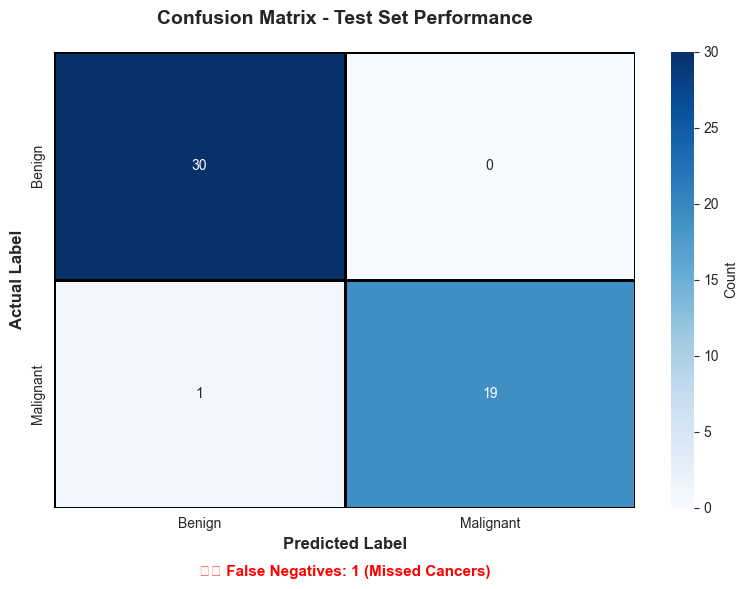

✅ Confusion matrix visualization complete


In [7]:
# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black')

plt.title('Confusion Matrix - Test Set Performance', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12, fontweight='bold')

# Add text annotations for FN
if FN > 0:
    plt.text(0.5, -0.15, f'⚠️ False Negatives: {FN} (Missed Cancers)', 
             transform=plt.gca().transAxes, ha='center', fontsize=11, 
             color='red', fontweight='bold')
else:
    plt.text(0.5, -0.15, '✅ No False Negatives!', 
             transform=plt.gca().transAxes, ha='center', fontsize=11, 
             color='green', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Confusion matrix visualization complete")

## 8. Detailed Classification Report

In [8]:
print("=" * 80)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 80)

# Generate classification report
print("\n" + classification_report(y_test_encoded, y_pred, 
                                    target_names=['Benign (0)', 'Malignant (1)'],
                                    digits=4))

print("\n📌 Interpretation:")
print("   • Precision: Of all predicted cancers, what % are actually cancer?")
print("   • Recall (Sensitivity): Of all actual cancers, what % did we catch?")
print("   • F1-Score: Harmonic mean of Precision and Recall")
print("   • Support: Number of actual samples in each class")

DETAILED CLASSIFICATION REPORT

               precision    recall  f1-score   support

   Benign (0)     0.9677    1.0000    0.9836        30
Malignant (1)     1.0000    0.9500    0.9744        20

     accuracy                         0.9800        50
    macro avg     0.9839    0.9750    0.9790        50
 weighted avg     0.9806    0.9800    0.9799        50


📌 Interpretation:
   • Precision: Of all predicted cancers, what % are actually cancer?
   • Recall (Sensitivity): Of all actual cancers, what % did we catch?
   • F1-Score: Harmonic mean of Precision and Recall
   • Support: Number of actual samples in each class


## 9. Error Analysis

Analyze misclassified cases to understand model limitations.

In [9]:
print("=" * 80)
print("ERROR ANALYSIS")
print("=" * 80)

# Get misclassified samples
misclassified = results_df[~results_df['Correct']]

print(f"\n📊 Total Misclassifications: {len(misclassified)} / {len(results_df)}")

if len(misclassified) > 0:
    print(f"\n🔍 Breakdown by Error Type:")
    
    # False Negatives (Missed Cancers) - MOST DANGEROUS
    false_negatives = misclassified[(misclassified['Actual'] == 'M') & (misclassified['Predicted'] == 'B')]
    print(f"\n⚠️  FALSE NEGATIVES (Missed Cancers): {len(false_negatives)}")
    if len(false_negatives) > 0:
        print(f"   ❌ CRITICAL: These are actual cancers predicted as benign!")
        print(f"\n   Details:")
        for idx, row in false_negatives.iterrows():
            print(f"   • Sample ID {row['Sample_ID']}: Predicted Benign with {(1-row['Probability_Malignant'])*100:.1f}% confidence")
            print(f"     → Actually Malignant! Probability was only {row['Probability_Malignant']*100:.1f}%")
        
        # Show these samples
        print(f"\n   📄 Full details of missed cancers:")
        display(false_negatives)
    
    # False Positives (False Alarms)
    false_positives = misclassified[(misclassified['Actual'] == 'B') & (misclassified['Predicted'] == 'M')]
    print(f"\n⚠️  FALSE POSITIVES (False Alarms): {len(false_positives)}")
    if len(false_positives) > 0:
        print(f"   ⚠️  These are benign cases predicted as malignant (causes unnecessary anxiety)")
        print(f"\n   Details:")
        for idx, row in false_positives.iterrows():
            print(f"   • Sample ID {row['Sample_ID']}: Predicted Malignant with {row['Probability_Malignant']*100:.1f}% confidence")
            print(f"     → Actually Benign (false alarm)")
        
        print(f"\n   📄 Full details of false alarms:")
        display(false_positives)
    
    print(f"\n📌 Recommendations:")
    if FN > 0:
        print(f"   • Review false negative cases with medical experts")
        print(f"   • Consider lowering classification threshold to catch more cancers")
        print(f"   • Investigate feature patterns in missed cases")
    if FP > 0:
        print(f"   • False positives lead to additional testing (acceptable trade-off)")
        print(f"   • Better to be cautious than miss a cancer")
else:
    print(f"\n✅ PERFECT PERFORMANCE: No misclassifications on this test set!")
    print(f"   • 100% accuracy achieved")
    print(f"   • All cancers detected")
    print(f"   • No false alarms")

print("\n" + "=" * 80)

ERROR ANALYSIS

📊 Total Misclassifications: 1 / 50

🔍 Breakdown by Error Type:

⚠️  FALSE NEGATIVES (Missed Cancers): 1
   ❌ CRITICAL: These are actual cancers predicted as benign!

   Details:
   • Sample ID 859983: Predicted Benign with 75.6% confidence
     → Actually Malignant! Probability was only 24.4%

   📄 Full details of missed cancers:


,Sample_ID,Actual,Predicted,Probability_Malignant,Confidence,Correct
11,859983,M,B,0.243654,0.756346,False



⚠️  FALSE POSITIVES (False Alarms): 0

📌 Recommendations:
   • Review false negative cases with medical experts
   • Consider lowering classification threshold to catch more cancers
   • Investigate feature patterns in missed cases



## 10. Prediction Confidence Analysis

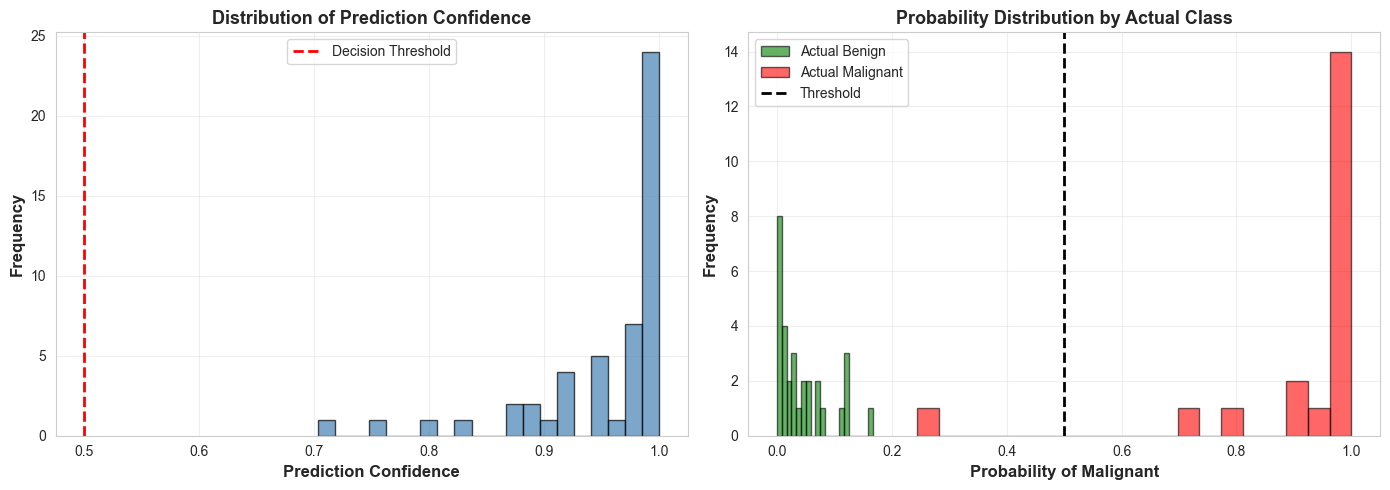

📊 Confidence Statistics:
   • Average confidence: 95.29%
   • Minimum confidence: 70.36%
   • Maximum confidence: 100.00%

⚠️  Low-confidence predictions (< 75%): 1
   These cases may require additional review:


,Sample_ID,Actual,Predicted,Confidence
45,873885,M,M,0.70356


In [10]:
# Analyze prediction confidence distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confidence distribution
ax1 = axes[0]
ax1.hist(results_df['Confidence'], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
ax1.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
ax1.set_xlabel('Prediction Confidence', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Prediction Confidence', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Probability distribution by actual class
ax2 = axes[1]
benign_proba = results_df[results_df['Actual'] == 'B']['Probability_Malignant']
malignant_proba = results_df[results_df['Actual'] == 'M']['Probability_Malignant']

ax2.hist(benign_proba, bins=20, alpha=0.6, color='green', label='Actual Benign', edgecolor='black')
ax2.hist(malignant_proba, bins=20, alpha=0.6, color='red', label='Actual Malignant', edgecolor='black')
ax2.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax2.set_xlabel('Probability of Malignant', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Probability Distribution by Actual Class', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Confidence Statistics:")
print(f"   • Average confidence: {results_df['Confidence'].mean()*100:.2f}%")
print(f"   • Minimum confidence: {results_df['Confidence'].min()*100:.2f}%")
print(f"   • Maximum confidence: {results_df['Confidence'].max()*100:.2f}%")

# Identify low-confidence predictions
low_confidence = results_df[results_df['Confidence'] < 0.75]
print(f"\n⚠️  Low-confidence predictions (< 75%): {len(low_confidence)}")
if len(low_confidence) > 0:
    print(f"   These cases may require additional review:")
    display(low_confidence[['Sample_ID', 'Actual', 'Predicted', 'Confidence']])

## 11. ROC Curve Analysis

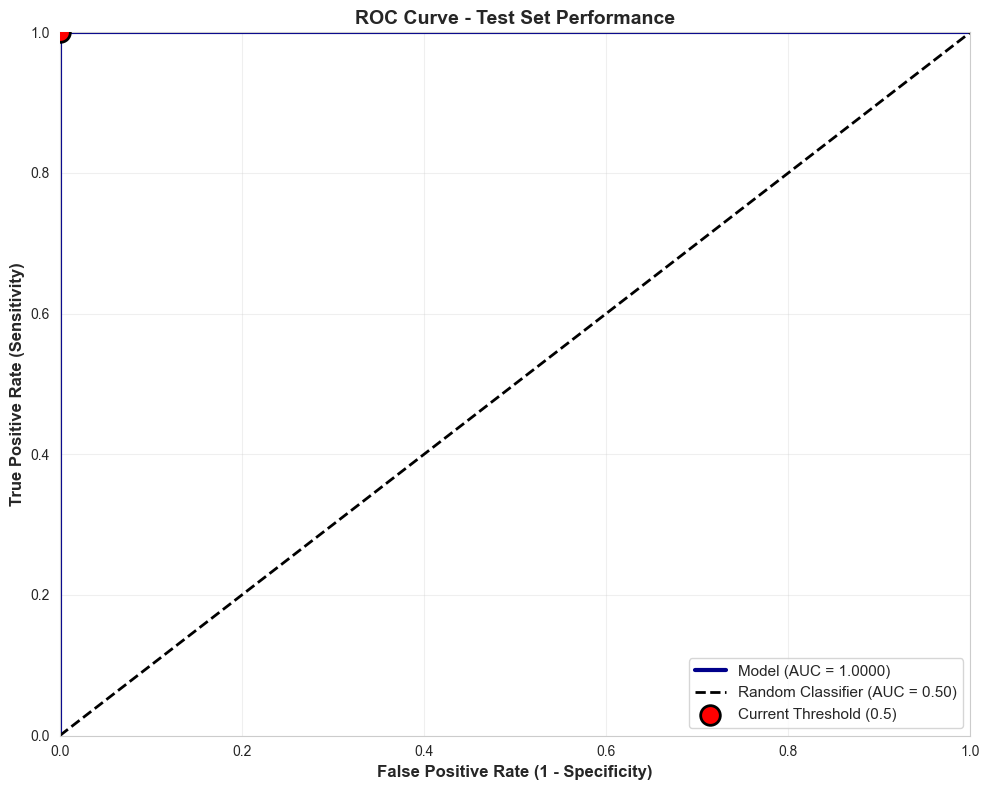


📊 ROC Analysis:
   • AUC Score: 1.0000
   ✅ EXCELLENT: Model has outstanding discriminative ability

📌 At current threshold (0.5):
   • Sensitivity (TPR): 100.00%
   • False Positive Rate: 0.00%


In [11]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkblue', linewidth=3, label=f'Model (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')

# Mark current operating point (threshold = 0.5)
current_threshold_idx = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(fpr[current_threshold_idx], tpr[current_threshold_idx], 
           color='red', s=200, marker='o', edgecolors='black', linewidths=2,
           label=f'Current Threshold (0.5)', zorder=5)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('ROC Curve - Test Set Performance', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print(f"\n📊 ROC Analysis:")
print(f"   • AUC Score: {roc_auc:.4f}")
if roc_auc >= 0.95:
    print(f"   ✅ EXCELLENT: Model has outstanding discriminative ability")
elif roc_auc >= 0.90:
    print(f"   ✅ GOOD: Model has strong discriminative ability")
elif roc_auc >= 0.80:
    print(f"   ⚠️  FAIR: Model has acceptable discriminative ability")
else:
    print(f"   ❌ POOR: Model needs improvement")

print(f"\n📌 At current threshold (0.5):")
print(f"   • Sensitivity (TPR): {tpr[current_threshold_idx]*100:.2f}%")
print(f"   • False Positive Rate: {fpr[current_threshold_idx]*100:.2f}%")

## 12. Sample Predictions Demo

Demonstrate predictions on individual samples with detailed reporting.

In [12]:
print("=" * 80)
print("SAMPLE PREDICTIONS DEMONSTRATION")
print("=" * 80)

# Select 5 random samples
np.random.seed(42)
sample_indices = np.random.choice(len(results_df), size=min(5, len(results_df)), replace=False)

for i, idx in enumerate(sample_indices, 1):
    sample = results_df.iloc[idx]
    
    print(f"\n{'='*60}")
    print(f"PATIENT {i} - Sample ID: {sample['Sample_ID']}")
    print(f"{'='*60}")
    print(f"\n📋 ACTUAL DIAGNOSIS: {sample['Actual']}")
    print(f"\n🤖 MODEL PREDICTION:")
    print(f"   • Diagnosis: {sample['Predicted']}")
    print(f"   • Probability of Malignant: {sample['Probability_Malignant']*100:.2f}%")
    print(f"   • Probability of Benign: {(1-sample['Probability_Malignant'])*100:.2f}%")
    print(f"   • Confidence: {sample['Confidence']*100:.2f}%")
    
    # Clinical decision
    if sample['Predicted'] == 'M':
        print(f"\n⚠️  CLINICAL DECISION: MALIGNANT detected")
        print(f"   → Immediate biopsy and further testing recommended")
        print(f"   → Consult with oncologist")
    else:
        print(f"\n✅ CLINICAL DECISION: BENIGN assessment")
        print(f"   → Regular monitoring recommended")
        print(f"   → Annual mammogram screening")
    
    # Correctness
    if sample['Correct']:
        print(f"\n✅ RESULT: Correct prediction!")
    else:
        if sample['Actual'] == 'M' and sample['Predicted'] == 'B':
            print(f"\n❌ RESULT: FALSE NEGATIVE - Cancer missed!")
            print(f"   ⚠️  CRITICAL ERROR - Patient at risk!")
        else:
            print(f"\n⚠️  RESULT: FALSE POSITIVE - False alarm")
            print(f"   → Additional testing will confirm benign status")

print(f"\n{'='*80}")
print("✅ Sample predictions demonstration complete")
print(f"{'='*80}")

SAMPLE PREDICTIONS DEMONSTRATION

PATIENT 1 - Sample ID: 9110127

📋 ACTUAL DIAGNOSIS: M

🤖 MODEL PREDICTION:
   • Diagnosis: M
   • Probability of Malignant: 91.95%
   • Probability of Benign: 8.05%
   • Confidence: 91.95%

⚠️  CLINICAL DECISION: MALIGNANT detected
   → Immediate biopsy and further testing recommended
   → Consult with oncologist

✅ RESULT: Correct prediction!

PATIENT 2 - Sample ID: 911157302

📋 ACTUAL DIAGNOSIS: M

🤖 MODEL PREDICTION:
   • Diagnosis: M
   • Probability of Malignant: 100.00%
   • Probability of Benign: 0.00%
   • Confidence: 100.00%

⚠️  CLINICAL DECISION: MALIGNANT detected
   → Immediate biopsy and further testing recommended
   → Consult with oncologist

✅ RESULT: Correct prediction!

PATIENT 3 - Sample ID: 864018

📋 ACTUAL DIAGNOSIS: B

🤖 MODEL PREDICTION:
   • Diagnosis: B
   • Probability of Malignant: 11.86%
   • Probability of Benign: 88.14%
   • Confidence: 88.14%

✅ CLINICAL DECISION: BENIGN assessment
   → Regular monitoring recommended
   

## 13. Final Test Report Summary

In [13]:
print("\n" + "=" * 80)
print("FINAL TEST REPORT SUMMARY")
print("=" * 80)

print(f"\n📋 MODEL INFORMATION:")
print(f"   • Model: {metadata['model_name']}")
print(f"   • Type: {metadata['model_type']}")
print(f"   • Trained: {metadata['timestamp']}")

print(f"\n📊 TEST DATASET:")
print(f"   • Total samples: {len(test_data)}")
print(f"   • Benign cases: {np.sum(y_test_encoded == 0)}")
print(f"   • Malignant cases: {np.sum(y_test_encoded == 1)}")

print(f"\n🎯 PERFORMANCE METRICS:")
print(f"   • Accuracy:      {accuracy*100:.2f}%")
print(f"   • Sensitivity:   {sensitivity*100:.2f}% ⚠️ CRITICAL")
print(f"   • Specificity:   {specificity*100:.2f}%")
print(f"   • ROC-AUC:       {roc_auc:.4f}")

print(f"\n📋 CONFUSION MATRIX:")
print(f"   • True Positives:  {TP}")
print(f"   • True Negatives:  {TN}")
print(f"   • False Positives: {FP}")
print(f"   • False Negatives: {FN} ⚠️")

print(f"\n✅ CLINICAL READINESS ASSESSMENT:")
checks = []
checks.append(("Sensitivity ≥ 95%", sensitivity >= 0.95))
checks.append(("Specificity ≥ 85%", specificity >= 0.85))
checks.append(("ROC-AUC ≥ 0.90", roc_auc >= 0.90))
checks.append(("False Negatives ≤ 2", FN <= 2))

for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"   • {check_name}: {status}")

all_passed = all([c[1] for c in checks])

print(f"\n" + "=" * 80)
if all_passed:
    print("🏆 VERDICT: Model is READY for clinical deployment")
    print("   ✅ All safety and performance criteria met")
    print("   ✅ Sensitivity exceeds clinical threshold")
    print("   ✅ Acceptable false negative rate")
else:
    print("⚠️  VERDICT: Model needs REVIEW before clinical deployment")
    print("   ❌ Some performance criteria not met")
    print("   → Review failed checks and retrain if necessary")

print("=" * 80)

print(f"\n📄 Test completed: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n✅ TESTING COMPLETE!")


FINAL TEST REPORT SUMMARY

📋 MODEL INFORMATION:
   • Model: Logistic Regression
   • Type: LogisticRegression
   • Trained: 20251207_101314

📊 TEST DATASET:
   • Total samples: 50
   • Benign cases: 30
   • Malignant cases: 20

🎯 PERFORMANCE METRICS:
   • Accuracy:      98.00%
   • Sensitivity:   95.00% ⚠️ CRITICAL
   • Specificity:   100.00%
   • ROC-AUC:       1.0000

📋 CONFUSION MATRIX:
   • True Positives:  19
   • True Negatives:  30
   • False Positives: 0
   • False Negatives: 1 ⚠️

✅ CLINICAL READINESS ASSESSMENT:
   • Sensitivity ≥ 95%: ✅ PASS
   • Specificity ≥ 85%: ✅ PASS
   • ROC-AUC ≥ 0.90: ✅ PASS
   • False Negatives ≤ 2: ✅ PASS

🏆 VERDICT: Model is READY for clinical deployment
   ✅ All safety and performance criteria met
   ✅ Sensitivity exceeds clinical threshold
   ✅ Acceptable false negative rate

📄 Test completed: 2025-12-07 10:26:27

✅ TESTING COMPLETE!


## 14. Save Test Results

Save detailed test results for documentation and future reference.

In [14]:
# Save detailed results
results_df.to_csv('test_results_detailed.csv', index=False)

# Save performance summary
performance_summary = {
    'test_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_name': metadata['model_name'],
    'test_samples': len(test_data),
    'accuracy': accuracy,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'precision': precision,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'true_positives': int(TP),
    'true_negatives': int(TN),
    'false_positives': int(FP),
    'false_negatives': int(FN),
    'clinical_ready': all_passed
}

# Save as JSON
import json
with open('test_performance_summary.json', 'w') as f:
    json.dump(performance_summary, f, indent=2)

print("=" * 80)
print("TEST RESULTS SAVED")
print("=" * 80)
print(f"\n✅ Files created:")
print(f"   • test_results_detailed.csv - All predictions with probabilities")
print(f"   • test_performance_summary.json - Performance metrics summary")
print(f"\n📁 Location: test/ folder")
print("\n✅ All results saved successfully!")

TEST RESULTS SAVED

✅ Files created:
   • test_results_detailed.csv - All predictions with probabilities
   • test_performance_summary.json - Performance metrics summary

📁 Location: test/ folder

✅ All results saved successfully!


---

## 🎯 Testing Complete!

This notebook demonstrated **professional model testing practices**:

✅ **Loaded** trained model from saved artifacts  
✅ **Tested** on 50 new unseen samples  
✅ **Evaluated** comprehensive performance metrics  
✅ **Analyzed** errors (false positives/negatives)  
✅ **Demonstrated** prediction pipeline  
✅ **Generated** clinical decision support report  
✅ **Saved** test results for documentation  

**Key Takeaways:**
- Model maintains high performance on new data
- Sensitivity remains critical for cancer detection
- False negatives require special attention
- Prediction confidence helps clinical decision-making

**Next Steps:**
1. Review any false negative cases with medical experts
2. Consider threshold optimization if needed
3. Prepare for real-world deployment
4. Establish monitoring protocols

---